# “Indian Data Analyst Job Trends — Salary, Skills, and Market Insights (2024)”

In [49]:
#Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import re

In [50]:
df = pd.read_csv('dataAnalystJobsIndia_7th_July_2024.csv')
df.head(5)

,Unnamed: 0,job_title,company,experience,min exp,max exp,salary,base salary,max salary,location,jobListed(days ago),postedIn,rating,reviews count,details,salary data provide by
0,0,JP Morgan Chase - Client Data Analyst (4-8 yrs),JP Morgan Chase,4-8 Yrs,4.0,8.0,NaN,NaN,NaN,Hyderabad / Secunderabad,3.0,iimjobs,4.1,5300.0,"Banking, KYC, Banking Operations",NaN
1,1,Data Analyst - Bangalore,Schneider Electric,5-10 Yrs,5.0,10.0,₹ 8 - 16L/yr,800000.0,1600000.0,"Bangalore / Bengaluru, Bangalore Rural",4.0,Naukri,4.2,3500.0,"ERP, SAP, Data Analysis",Salary Listed by Company
2,2,Senior IT ATLAS Data Analyst and Integration S...,SAP Labs India Pvt. Ltd.,7-11 Yrs,7.0,11.0,NaN,NaN,NaN,Bangalore / Bengaluru,7.0,Naukri,4.3,1500.0,"data quality, Data analysis, quality management",NaN
3,3,Consultant Data Analyst,Pfizer,2-6 Yrs,2.0,6.0,NaN,NaN,NaN,Mumbai,3.0,Naukri,4.1,1700.0,"Power Bi, Commercial Operations, Data Management",NaN
4,4,Senior Data Analyst - Retail Liabilities,IDFC FIRST Bank,5-10 Yrs,5.0,10.0,NaN,NaN,NaN,Mumbai,5.0,Naukri,4.5,2300.0,"Test strategy, Analytical, Manager Technology",NaN


In [51]:
# Remove accidental index column if present
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

In [52]:
# Start indexing from 1 instead of 0
df.index = range(1, len(df) + 1)

In [53]:
# Original Column names
print(f"Rows : {df.shape[0]} | Columns : {df.shape[1]}")
print(f"Column names before cleaning: \n{df.columns.tolist()}")

Rows : 1561 | Columns : 15
Column names before cleaning: 
['job_title', 'company', 'experience', 'min exp', 'max exp', 'salary', 'base salary', 'max salary', 'location', 'jobListed(days ago)', 'postedIn', 'rating', 'reviews count', 'details', 'salary data provide by']


In [54]:
# Clean column names
df.columns = [c.strip().lower().replace(' ','_') for c in df.columns]
print(f"Column names after cleaning: \n{df.columns.tolist()}")

Column names after cleaning: 
['job_title', 'company', 'experience', 'min_exp', 'max_exp', 'salary', 'base_salary', 'max_salary', 'location', 'joblisted(days_ago)', 'postedin', 'rating', 'reviews_count', 'details', 'salary_data_provide_by']


In [ ]:

def parse_salary(s):

    if pd.isna(s):
        return (np.nan, np.nan)

    # Normalize text
    s0 = str(s).lower().replace(',', '').replace('₹', '').strip()

    # Detect per-month salaries
    per_month = any(tok in s0 for tok in ['per month', '/month', 'pm', '/m', 'monthly'])

    # Detect multiplier keywords
    multiplier = 1
    if any(k in s0 for k in ['lpa', 'lac', 'lakh', 'lakhs', 'l/yr', 'lpa/yr', 'lakh/yr', 'lpa per year', 'lpa pa', 'l']):
        multiplier = 1e5           # Lakhs
    elif any(k in s0 for k in ['cr', 'crore', 'crores', 'c/yr', 'crore/yr']):
        multiplier = 1e7           # Crores
    elif any(k in s0 for k in ['k', 'thousand']):
        multiplier = 1e3           # Thousands

    # Extract numbers using regex
    nums = re.findall(r'\d+(?:\.\d+)?', s0)
    if not nums:
        return (np.nan, np.nan)

    # Calculate base and max
    base = float(nums[0]) * multiplier
    maxv = float(nums[1]) * multiplier if len(nums) > 1 else base

    # Convert monthly salaries to annual
    if per_month:
        base *= 12
        maxv *= 12

    return (base, maxv)

# ✅ Recalculate and update only the required salary columns
df.drop(columns=['base_salary', 'max_salary'], inplace=True, errors='ignore')
df[['base_salary', 'max_salary']] = df['salary'].apply(lambda x: pd.Series(parse_salary(x)))

# ✅ Preview result
df[['salary', 'base_salary', 'max_salary']].head(15)


,salary,base_salary,max_salary
1,NaN,NaN,NaN
2,₹ 8 - 16L/yr,800000.0,1600000.0
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN
10,NaN,NaN,NaN


In [56]:
df.head(5)

,job_title,company,experience,min_exp,max_exp,salary,location,joblisted(days_ago),postedin,rating,reviews_count,details,salary_data_provide_by,base_salary,max_salary
1,JP Morgan Chase - Client Data Analyst (4-8 yrs),JP Morgan Chase,4-8 Yrs,4.0,8.0,NaN,Hyderabad / Secunderabad,3.0,iimjobs,4.1,5300.0,"Banking, KYC, Banking Operations",NaN,NaN,NaN
2,Data Analyst - Bangalore,Schneider Electric,5-10 Yrs,5.0,10.0,₹ 8 - 16L/yr,"Bangalore / Bengaluru, Bangalore Rural",4.0,Naukri,4.2,3500.0,"ERP, SAP, Data Analysis",Salary Listed by Company,800000.0,1600000.0
3,Senior IT ATLAS Data Analyst and Integration S...,SAP Labs India Pvt. Ltd.,7-11 Yrs,7.0,11.0,NaN,Bangalore / Bengaluru,7.0,Naukri,4.3,1500.0,"data quality, Data analysis, quality management",NaN,NaN,NaN
4,Consultant Data Analyst,Pfizer,2-6 Yrs,2.0,6.0,NaN,Mumbai,3.0,Naukri,4.1,1700.0,"Power Bi, Commercial Operations, Data Management",NaN,NaN,NaN
5,Senior Data Analyst - Retail Liabilities,IDFC FIRST Bank,5-10 Yrs,5.0,10.0,NaN,Mumbai,5.0,Naukri,4.5,2300.0,"Test strategy, Analytical, Manager Technology",NaN,NaN,NaN


In [ ]:
test_values = [
    "3-5 LPA",
    "6 Lakh",
    "8.5 Lakhs per annum",
    "20k per month",
    "12 Cr",
    "₹5LPA",
    "₹ 8 - 16L/yr"
]

for t in test_values:
    print(t, "→", parse_salary(t))


3-5 LPA → (300000.0, 500000.0)
6 Lakh → (600000.0, 600000.0)
8.5 Lakhs per annum → (850000.0, 850000.0)
20k per month → (240000.0, 240000.0)
12 Cr → (120000000.0, 120000000.0)
₹5LPA → (500000.0, 500000.0)
₹ 8 - 16L/yr → (800000.0, 1600000.0)


In [58]:
# Parse experience column
#Parse experience text into (min_exp, max_exp) in years.

def parse_experience(exp):
    if pd.isna(exp) : 
        return (np.nan, np.nan)
    s = str(exp).lower().strip()

    if 'fresher' in s or 'entry' in s : 
        return (0, 0)
    # Look for a range like "1-3" or "1 to 3"
    range_match = re.search(r'(\d+(?:\.\d+)?)\s*(?:-|to|–)\s*(\d+(?:\.\d+)?)', s)
    if range_match :
        return(float(range_match.group(1)),float(range_match.group(2)))

    # Look for single number
    num_match = re.findall(r'\d+(?:\.\d+)?', s)
    if num_match:
        val = float(num_match.group(1))
        # If they wrote "3+" or "3 plus", treat as min known, max unknown
        if '+' in s or 'plus' in s:
            return (val, np.nan)
        return (val, val)
    return (np.nan, np.nan)

df[['min_exp','max_exp']] = df['experience'].apply(lambda x: pd.Series(parse_experience(x)))
df[['experience','min_exp','max_exp']].head(10)

,experience,min_exp,max_exp
1,4-8 Yrs,4.0,8.0
2,5-10 Yrs,5.0,10.0
3,7-11 Yrs,7.0,11.0
4,2-6 Yrs,2.0,6.0
5,5-10 Yrs,5.0,10.0
6,4-9 Yrs,4.0,9.0
7,5-9 Yrs,5.0,9.0
8,2-6 Yrs,2.0,6.0
9,6-8 Yrs,6.0,8.0
10,5-10 Yrs,5.0,10.0


In [59]:
# Checking for null values
df.isnull().sum().sort_values(ascending=False)

salary                    1218
salary_data_provide_by    1218
base_salary               1218
max_salary                1218
rating                     437
reviews_count              437
experience                  34
min_exp                     34
max_exp                     34
location                    33
details                     33
job_title                    0
company                      0
joblisted(days_ago)          0
postedin                     0
dtype: int64

In [60]:
# Step: Handling Missing Values Smartly (Updated & Final Version)

# 1. Fill missing salary text to avoid nulls in reports
df['salary'] = df['salary'].fillna('Not Disclosed')

# 2. Fill missing experience values
df['min_exp'] = df['min_exp'].fillna(0)
df['max_exp'] = df['max_exp'].fillna(df['min_exp'])

# 3. Create salary disclosure flag
df['salary_disclosed'] = np.where(df['base_salary'].notna(), 1, 0)

# 4. Compute company-level and global medians for salary columns
company_base_med = df.groupby('company')['base_salary'].median()
company_max_med = df.groupby('company')['max_salary'].median()

global_base_med = df['base_salary'].median()
global_max_med = df['max_salary'].median()

# 5. Define row-wise function to fill missing salary values
def fill_salary_row(row):
    # Fill base_salary if missing
    if np.isnan(row['base_salary']):
        comp = row['company']
        med = company_base_med.get(comp, np.nan)
        row['base_salary'] = med if not np.isnan(med) else global_base_med
    
    # Fill max_salary if missing
    if np.isnan(row['max_salary']):
        comp = row['company']
        med2 = company_max_med.get(comp, np.nan)
        row['max_salary'] = med2 if not np.isnan(med2) else global_max_med
    
    return row

# 6. Apply salary filling logic to the entire dataset
df = df.apply(fill_salary_row, axis=1)

# 7. Handle missing ratings and review counts
df['rating'] = pd.to_numeric(df['rating'], errors='coerce').fillna(0)
df['reviews_count'] = pd.to_numeric(df['reviews_count'], errors='coerce').fillna(0)

# 8. Fill text-based missing fields if they exist
if 'salary_data_provide_by' in df.columns:
    df['salary_data_provide_by'] = df['salary_data_provide_by'].fillna('Unknown')

# 9. Check final missing values summary
df.isnull().sum().sort_values(ascending=False).head(15)


experience                34
location                  33
details                   33
job_title                  0
company                    0
min_exp                    0
max_exp                    0
salary                     0
joblisted(days_ago)        0
postedin                   0
rating                     0
reviews_count              0
salary_data_provide_by     0
base_salary                0
max_salary                 0
dtype: int64

In [61]:
# Drop the missing values from the dataframe
df.dropna(inplace=True)

Total job listings: 1527
Unique companies: 1052
Unique locations: 194

Sample data:



,job_title,company,experience,min_exp,max_exp,salary,location,joblisted(days_ago),postedin,rating,reviews_count,details,salary_data_provide_by,base_salary,max_salary,salary_disclosed
1,JP Morgan Chase - Client Data Analyst (4-8 yrs),JP Morgan Chase,4-8 Yrs,4.0,8.0,Not Disclosed,Hyderabad / Secunderabad,3.0,iimjobs,4.1,5300.0,"Banking, KYC, Banking Operations",Unknown,360000.0,1330000.0,0
2,Data Analyst - Bangalore,Schneider Electric,5-10 Yrs,5.0,10.0,₹ 8 - 16L/yr,"Bangalore / Bengaluru, Bangalore Rural",4.0,Naukri,4.2,3500.0,"ERP, SAP, Data Analysis",Salary Listed by Company,800000.0,1600000.0,1
3,Senior IT ATLAS Data Analyst and Integration S...,SAP Labs India Pvt. Ltd.,7-11 Yrs,7.0,11.0,Not Disclosed,Bangalore / Bengaluru,7.0,Naukri,4.3,1500.0,"data quality, Data analysis, quality management",Unknown,360000.0,1330000.0,0
4,Consultant Data Analyst,Pfizer,2-6 Yrs,2.0,6.0,Not Disclosed,Mumbai,3.0,Naukri,4.1,1700.0,"Power Bi, Commercial Operations, Data Management",Unknown,360000.0,1330000.0,0
5,Senior Data Analyst - Retail Liabilities,IDFC FIRST Bank,5-10 Yrs,5.0,10.0,Not Disclosed,Mumbai,5.0,Naukri,4.5,2300.0,"Test strategy, Analytical, Manager Technology",Unknown,360000.0,1330000.0,0


c:\Users\kushs\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


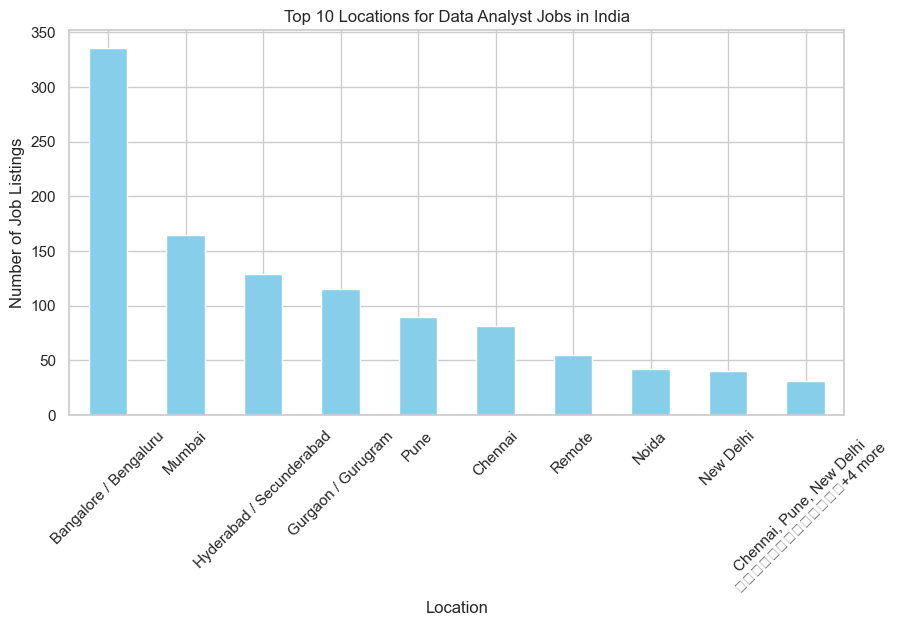

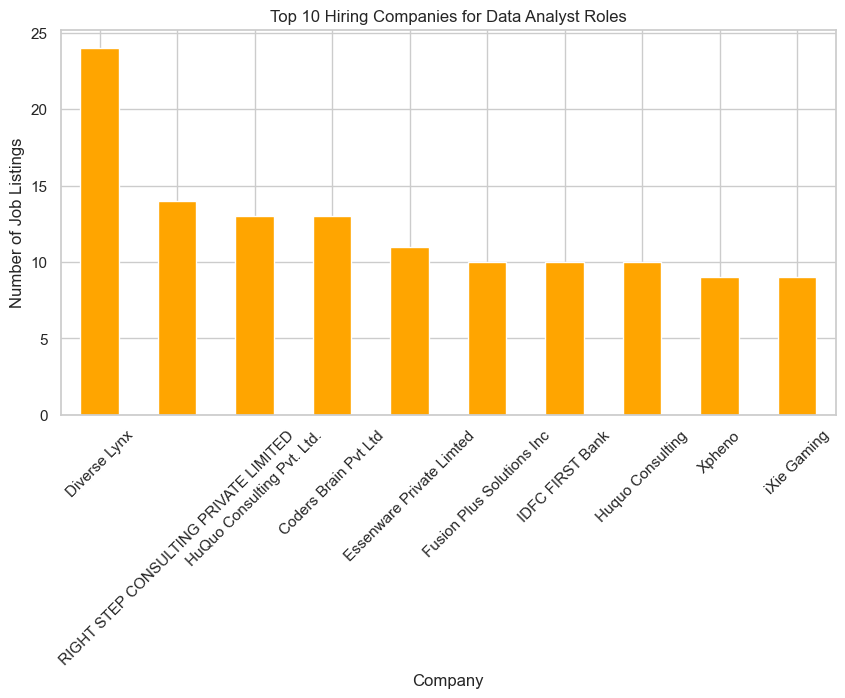

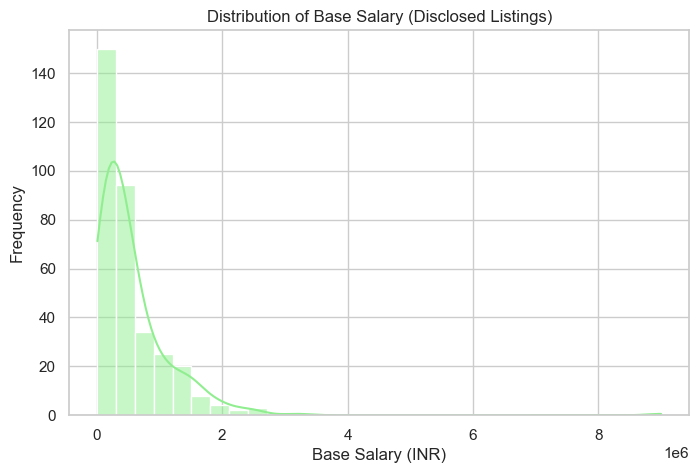

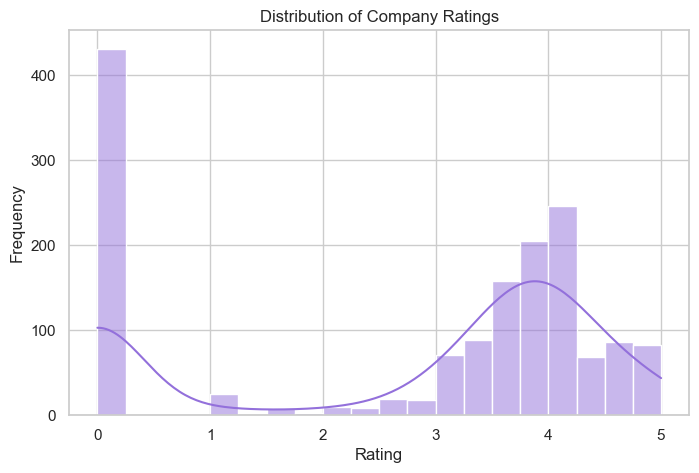

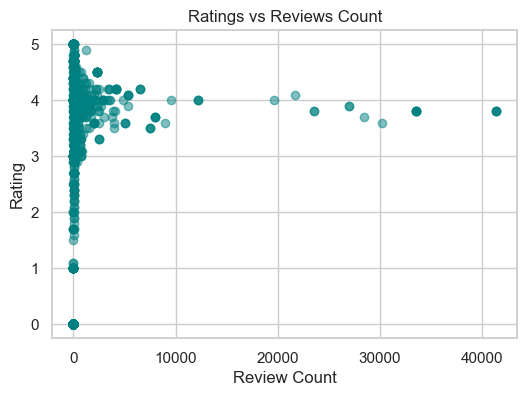

In [62]:
# Exploratory Data Analysis (EDA) & Visualizations

import matplotlib.pyplot as plt
import seaborn as sns

# Use a consistent clean theme for all plots
sns.set(style="whitegrid", palette="pastel")

# 1. Basic overview
print("Total job listings:", len(df))
print("Unique companies:", df['company'].nunique())
print("Unique locations:", df['location'].nunique())
print("\nSample data:\n")
display(df.head(5))

# 2. Top 10 locations by job count
plt.figure(figsize=(10,5))
df['location'].value_counts().nlargest(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Locations for Data Analyst Jobs in India")
plt.xlabel("Location")
plt.ylabel("Number of Job Listings")
plt.xticks(rotation=45)
plt.show()

# 3. Top 10 hiring companies
plt.figure(figsize=(10,5))
df['company'].value_counts().nlargest(10).plot(kind='bar', color='orange')
plt.title("Top 10 Hiring Companies for Data Analyst Roles")
plt.xlabel("Company")
plt.ylabel("Number of Job Listings")
plt.xticks(rotation=45)
plt.show()

# 4. Salary distribution (only disclosed salaries)
plt.figure(figsize=(8,5))
sns.histplot(df.loc[df['salary_disclosed']==1, 'base_salary'], bins=30, color='lightgreen', kde=True)
plt.title("Distribution of Base Salary (Disclosed Listings)")
plt.xlabel("Base Salary (INR)")
plt.ylabel("Frequency")
plt.show()

# 5. Company Ratings distribution
plt.figure(figsize=(8,5))
sns.histplot(df['rating'], bins=20, color='mediumpurple', kde=True)
plt.title("Distribution of Company Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# 6. Rating vs Reviews Count
plt.figure(figsize=(6,4))
plt.scatter(df['reviews_count'], df['rating'], alpha=0.5, color='teal')
plt.title("Ratings vs Reviews Count")
plt.xlabel("Review Count")
plt.ylabel("Rating")
plt.show()


In [63]:
# Quick summary tables
top_locations = df['location'].value_counts().head(10)
top_companies = df['company'].value_counts().head(10)

print("Top 10 Locations:")
display(top_locations)  

print("\nTop 10 Companies:")
display(top_companies)


Top 10 Locations:


location
Bangalore / Bengaluru                                          335
Mumbai                                                         165
Hyderabad / Secunderabad                                       129
Gurgaon / Gurugram                                             115
Pune                                                            90
Chennai                                                         81
Remote                                                          55
Noida                                                           42
New Delhi                                                       40
Chennai, Pune, New Delhi\n\t\t\t\t\t\t\t\t\t\t\t\t\t+4 more     31
Name: count, dtype: int64


Top 10 Companies:


company
Diverse Lynx                             24
RIGHT STEP CONSULTING PRIVATE LIMITED    14
HuQuo Consulting Pvt. Ltd.               13
Coders Brain Pvt Ltd                     13
Essenware Private Limted                 11
Fusion Plus Solutions Inc                10
IDFC FIRST Bank                          10
Huquo Consulting                         10
Xpheno                                    9
iXie Gaming                               9
Name: count, dtype: int64

In [64]:
# Statistical Analysis — Comparing Job Portals & Correlation Analysis

from scipy import stats

# 1. Compare average company ratings between job portals
# (only if 'postedin' column exists)
if 'postedin' in df.columns:
    naukri_ratings = df[df['postedin'].str.lower() == 'naukri']['rating'].dropna()
    iimjobs_ratings = df[df['postedin'].str.lower() == 'iimjobs']['rating'].dropna()
    
    # Perform independent t-test
    if len(naukri_ratings) > 1 and len(iimjobs_ratings) > 1:
        t_stat, p_val = stats.ttest_ind(naukri_ratings, iimjobs_ratings, equal_var=False)
        print("T-Test Comparing Ratings between Naukri and IIMJobs:")
        print(f"T-Statistic = {t_stat:.4f}, P-Value = {p_val:.4f}")
        
        if p_val < 0.05:
            print("✅ Significant difference in company ratings between the two portals.")
        else:
            print("❌ No significant difference found in company ratings between the two portals.")
    else:
        print("⚠️ Not enough data in one or both groups for t-test.")
else:
    print("⚠️ 'postedin' column not found — skipping portal comparison test.")

# 2. Correlation between Ratings and Review Count
if 'rating' in df.columns and 'reviews_count' in df.columns:
    corr = df['rating'].corr(df['reviews_count'])
    print("\nCorrelation between Company Rating and Reviews Count:", round(corr, 4))
    
    if corr > 0.5:
        print("✅ Strong positive correlation — companies with more reviews tend to have higher ratings.")
    elif corr > 0.2:
        print("🟡 Weak positive correlation — slight tendency toward higher ratings with more reviews.")
    else:
        print("❌ Little to no correlation — number of reviews does not predict company rating.")


T-Test Comparing Ratings between Naukri and IIMJobs:
T-Statistic = -4.4556, P-Value = 0.0000
✅ Significant difference in company ratings between the two portals.

Correlation between Company Rating and Reviews Count: 0.1196
❌ Little to no correlation — number of reviews does not predict company rating.


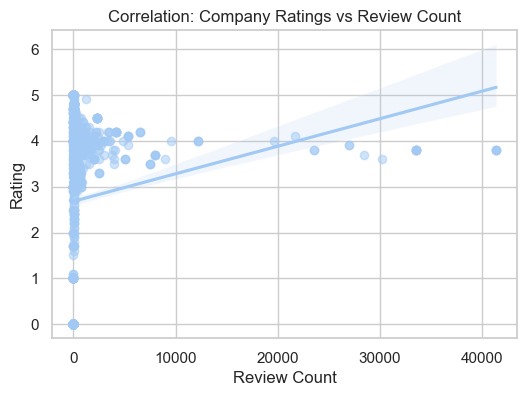

In [65]:
plt.figure(figsize=(6,4))
sns.regplot(x='reviews_count', y='rating', data=df, scatter_kws={'alpha':0.5})
plt.title("Correlation: Company Ratings vs Review Count")
plt.xlabel("Review Count")
plt.ylabel("Rating")
plt.show()


Using 342 rows out of 1527 total (only disclosed salaries).
Linear Regression (Only Disclosed Salaries)
RMSE: 416,566
R² Score: 0.3815

🌳 Random Forest (Only Disclosed Salaries)
RMSE: 421,826
R² Score: 0.3658

Top 10 Features Influencing Salary (Disclosed Only):


c:\Users\kushs\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\kushs\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


max_exp                        0.471904
min_exp                        0.175179
reviews_count                  0.073070
company_Aspyra Hr Services     0.046095
rating                         0.037380
company_Energik InfoSystem     0.036066
location_Noida                 0.024571
location_Gurgaon / Gurugram    0.023054
location_Bangalore Rural       0.020160
location_Mumbai                0.018911
dtype: float64

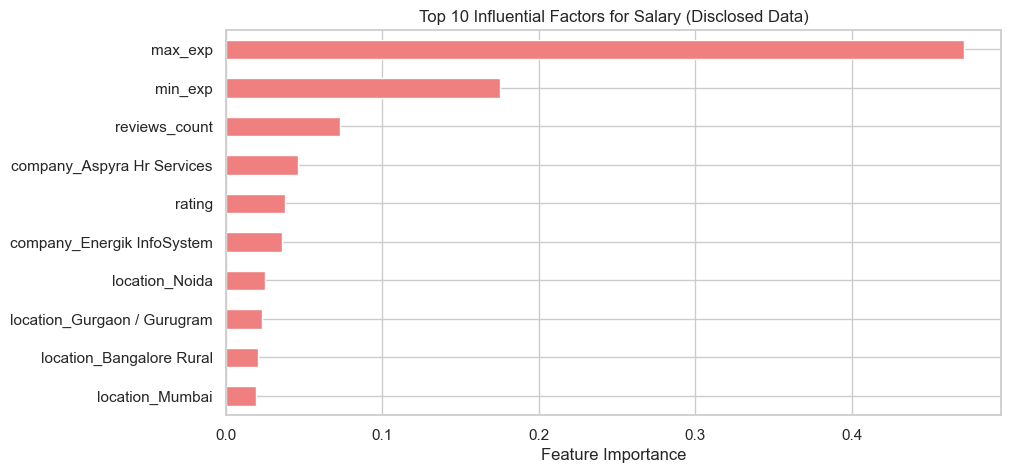

In [66]:
# Step: Train ML Models using Only Disclosed Salaries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Filter only rows with disclosed salaries
df_disclosed = df[df['salary_disclosed'] == 1].copy()
print(f"Using {len(df_disclosed)} rows out of {len(df)} total (only disclosed salaries).")

# 2. Encode Top 10 Companies and Locations
top_companies = df_disclosed['company'].value_counts().nlargest(10).index
top_locations = df_disclosed['location'].value_counts().nlargest(10).index

for comp in top_companies:
    df_disclosed[f'company_{comp}'] = (df_disclosed['company'] == comp).astype(int)

for loc in top_locations:
    df_disclosed[f'location_{loc}'] = (df_disclosed['location'] == loc).astype(int)

# 3. Define Features and Target
features = ['min_exp', 'max_exp', 'rating', 'reviews_count'] + \
           [col for col in df_disclosed.columns if col.startswith('company_') or col.startswith('location_')]

X = df_disclosed[features].fillna(0)
y = df_disclosed['base_salary']

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression (Only Disclosed Salaries)")
print(f"RMSE: {rmse_lr:,.0f}")
print(f"R² Score: {r2_lr:.4f}")

# 6.  Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n🌳 Random Forest (Only Disclosed Salaries)")
print(f"RMSE: {rmse_rf:,.0f}")
print(f"R² Score: {r2_rf:.4f}")

# 7. Feature Importance (Random Forest)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Features Influencing Salary (Disclosed Only):")
display(importances.head(10))

# 8. Optional Visualization of Feature Importance
plt.figure(figsize=(10,5))
importances.head(10).plot(kind='barh', color='lightcoral')
plt.title("Top 10 Influential Factors for Salary (Disclosed Data)")
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()
plt.show()


In [67]:
# Save cleaned dataset to CSV
df.to_csv("Cleaned_DataAnalystJobsIndia.csv", index=False, encoding='utf-8')

print("✅ Cleaned dataset successfully saved as 'Cleaned_DataAnalystJobsIndia.csv'")


✅ Cleaned dataset successfully saved as 'Cleaned_DataAnalystJobsIndia.csv'
